In [2]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
correlation = df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

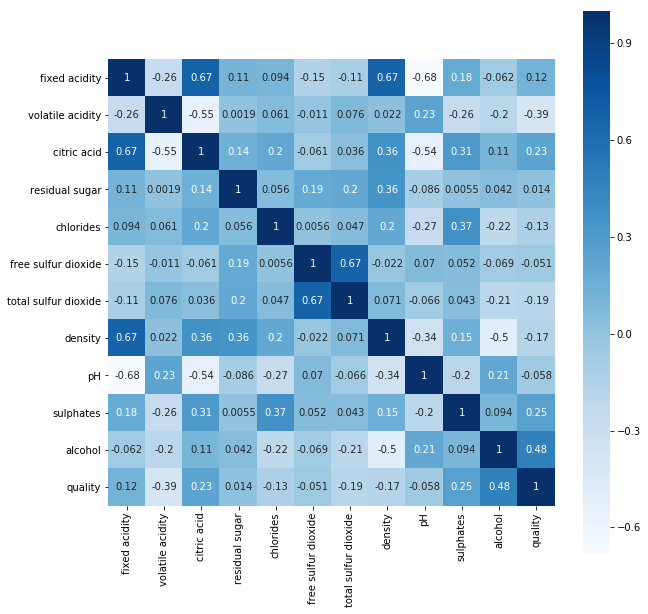

In [6]:
#Checking for correlation between different features
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1.0, square=True, annot=True, cmap='Blues')

In [7]:
#It should be interesting to see how each feature regressis against the target
features = list(df)

In [8]:
features.remove('quality')
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

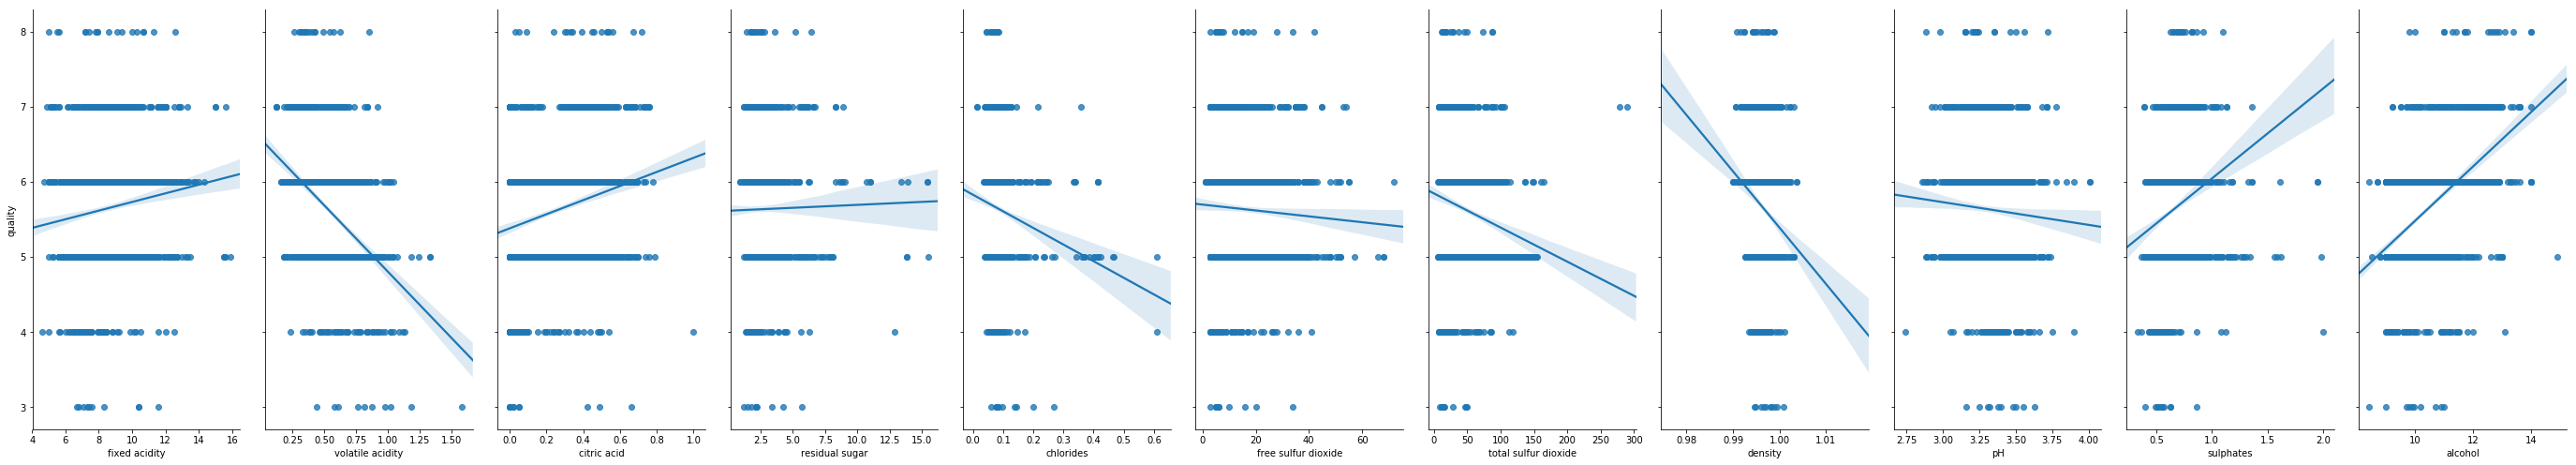

In [9]:
sns.pairplot(df, x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)

In [10]:
X = df.drop(columns = ['quality'])

In [31]:
y = df['quality']

In [12]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression

In [15]:
L1 = LinearRegression(n_jobs = 4)

In [16]:
L1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [17]:
L1.score(X_test, y_test)

0.3207112434321937

In [18]:
accuracy = L1.score(X_test, y_test)*100
print('Accuracy = {}%'.format(int(round(accuracy))))

Accuracy = 32%


In [19]:
print('Slope = {}'.format(L1.coef_))
print('Intercept = {}'.format(round(L1.intercept_)))

Slope = [  2.02362546e-02  -1.21385635e+00  -9.84560496e-02   2.21024824e-02
  -1.89761853e+00   1.99433159e-03  -3.00386885e-03  -1.67249074e+01
  -3.97705407e-01   8.54179475e-01   2.67506351e-01]
Intercept = 21.0


In [20]:
#Calculating Mean Square Error. The lower the better!
import numpy as np
print('Mean Square Error = {}'.format(np.mean((L1.predict(X_test) - y_test) ** 2)))

Mean Square Error = 0.400780366375006


In [21]:
#Now let's see how the variance is in the model. 1 results in perfect prediction a.k.a overfitting and stuff.
print('Variance = {}'.format(accuracy/100))

Variance = 0.32071124343219365


In [22]:
#Can we improve the model with cross-validation?
from sklearn.model_selection import cross_val_score

In [23]:
score = cross_val_score(L1,X,y,cv=15,n_jobs=4)
print(score)


[-0.13428774  0.18580533  0.26290735  0.27112729  0.34515813  0.26687169
 -0.03557708  0.31297379  0.39167371  0.35104734  0.31610007  0.2830302
  0.27331392  0.28314965  0.2867465 ]


In [24]:
#Implementing R2 scores, same as calculating variance as earlier.
from sklearn.metrics import r2_score
y_pred = L1.predict(X_test)

In [25]:
print('R2 score = {}'.format(r2_score(y_test, y_pred)))

R2 score = 0.3207112434321937
